In [4]:
from utils.utils import cal_hv
import json
import numpy as np


def cal(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    test_result = data['test_result']
    objectives = []
    for value in test_result:
        objectives.append([value["normal_reject"], value["normal_cost"]])
    objectives = np.array(objectives)
    hv = cal_hv(objectives, np.array([1,1]))
    time = data["time_train"]
    return hv, time

def cal_algorithms(data_set):
    print(data_set[:-5])
    surrogate_path = "Test_result/Surrogate/" + data_set
    print("Surrogate")
    print(cal(surrogate_path))

    NSGAII_path = "Test_result/NSGAII/" + data_set
    print("NSGAII")
    print(cal(NSGAII_path))

    MOEAD_path = "Test_result/MOEAD/" + data_set
    print("MOEAD")
    print(cal(MOEAD_path))

    # SPEA_path = "Test_result/SPEA/" + data_set
    # print("SPEA")
    # print(cal(SPEA_path))



In [5]:
cal_algorithms("07_03_2024_nsf_centers_easy_s3.json")

07_03_2024_nsf_centers_easy_s3
Surrogate

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

(0.1363547645767008, 439.00895643234253)
NSGAII
(0.13817028434747763, 775.9504039287567)
MOEAD
(0.13587338268022237, 766.0862174034119)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Surrogate = [0.16555343389462732, 0.1558483657110979, 0.26683495582071953, 0.23773854028942093 ]
surrogate_time = [1314.6013622283936, 466.3978068828583, 1200.8083612918854, 1137.0659022331238 ]
NSGAII = [0.16828153216838507, 0.15659568545803826,0.2812749143962913, 0.24798508721092216 ]
NSGAII_time = [3280.8819234371185, 1583.058861732483, 4213.758901357651, 3730.620888710022]
MOEAD = [0.16965441598102726, 0.15460673487773027, 0.282645068536752, 0.250308920823887 ]
MOEAD_time = [3798.5264599323273, 1444.9109947681427, 3161.6057567596436, 2485.965169906616]
SPEA = [0.15853880476419216, 0.145130227636935, 0.26506106161757825, 0.23722517795829115 ]
SPEA_time = [6956.865525007248, 1918.3201296329498, 3623.9244561195374, 4569.5873503685  ]

name = ["Test 1", "Test 2", "Test 3", "Test 4"]


In [15]:
cal_algorithms("nsf_centers_hard_s3.json")


nsf_centers_hard_s3
Surrogate
(0.16555343389462732, 1314.6013622283936)
NSGAII
(0.16828153216838507, 3280.8819234371185)
MOEAD
(0.16965441598102726, 3798.5264599323273)
SPEA
(0.15853880476419216, 6956.865525007248)


In [16]:
cal_algorithms("nsf_centers_normal_s3.json")

nsf_centers_normal_s3
Surrogate
(0.1558483657110979, 466.3978068828583)
NSGAII
(0.15659568545803826, 1583.058861732483)
MOEAD
(0.15460673487773027, 1444.9109947681427)
SPEA
(0.145130227636935, 1918.3201296329498)


In [17]:
cal_algorithms("nsf_rural_easy_s3.json")

nsf_rural_easy_s3
Surrogate
(0.26683495582071953, 1200.8083612918854)
NSGAII
(0.2812749143962913, 4213.758901357651)
MOEAD
(0.282645068536752, 3161.6057567596436)
SPEA
(0.26506106161757825, 3623.9244561195374)


In [18]:
cal_algorithms("nsf_rural_hard_s3.json")

nsf_rural_hard_s3
Surrogate
(0.1860813236609791, 4232.181252479553)
NSGAII
(0.243381693490546, 8393.0488986969)
MOEAD
(0.2518393898006895, 12806.229177951813)
SPEA
(0.2387273674490549, 23620.878692150116)


In [19]:
cal_algorithms("nsf_uniform_easy_s3.json")

nsf_uniform_easy_s3
Surrogate
(0.23773854028942093, 1137.0659022331238)
NSGAII
(0.24798508721092216, 3730.620888710022)
MOEAD
(0.250308920823887, 2485.965169906616)
SPEA
(0.23722517795829115, 4569.5873503685)


In [ ]:
Surrogate = [0.16555343389462732, 0.1558483657110979, 0.26683495582071953, 0.23773854028942093 ]
NSGAII = [0.16828153216838507, 0.15659568545803826,0.2812749143962913, 0.24798508721092216 ]
MOEAD = [0.16965441598102726, 0.15460673487773027, 0.282645068536752, 0.250308920823887 ]
SPEA = [0.15853880476419216, 0.145130227636935, 0.26506106161757825, 0.23722517795829115 ]

name = ["Test 1", "Test 2", "Test 3", "Test 4"]

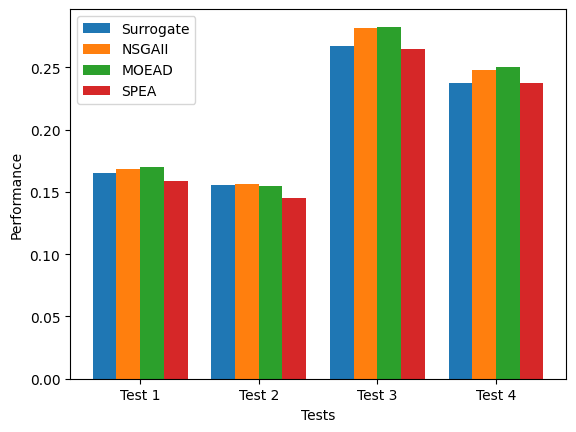

In [1]:
import matplotlib.pyplot as plt

# Dữ liệu
Surrogate = [0.16555343389462732, 0.1558483657110979, 0.26683495582071953, 0.23773854028942093]
NSGAII = [0.16828153216838507, 0.15659568545803826, 0.2812749143962913, 0.24798508721092216]
MOEAD = [0.16965441598102726, 0.15460673487773027, 0.282645068536752, 0.250308920823887]
SPEA = [0.15853880476419216, 0.145130227636935, 0.26506106161757825, 0.23722517795829115]

name = ["Test 1", "Test 2", "Test 3", "Test 4"]

# Số lượng nhóm
num_groups = len(name)

# Độ rộng của mỗi cột
bar_width = 0.2

# Vị trí của các cột trên trục x
index = range(num_groups)

# Vẽ biểu đồ cột
plt.bar(index, Surrogate, bar_width, label='Surrogate')
plt.bar([i + bar_width for i in index], NSGAII, bar_width, label='NSGAII')
plt.bar([i + 2 * bar_width for i in index], MOEAD, bar_width, label='MOEAD')
plt.bar([i + 3 * bar_width for i in index], SPEA, bar_width, label='SPEA')

# Đặt tên cho trục x và trục y
plt.xlabel('Tests')
plt.ylabel('Performance')

# Đặt tên cho các nhóm trên trục x
plt.xticks([i + 1.5 * bar_width for i in index], name)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


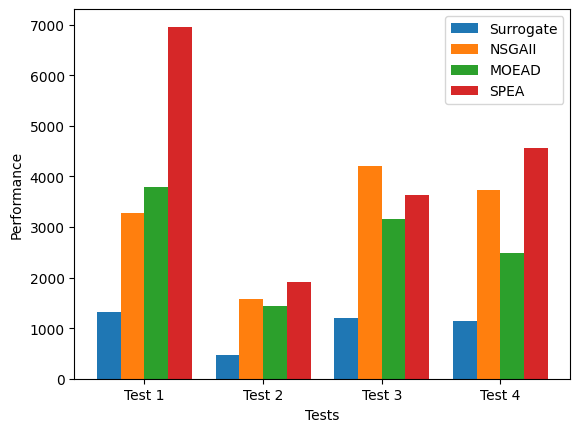

In [3]:
import matplotlib.pyplot as plt

# Dữ liệu
surrogate_time = [1314.6013622283936, 466.3978068828583, 1200.8083612918854, 1137.0659022331238 ]
NSGAII_time = [3280.8819234371185, 1583.058861732483, 4213.758901357651, 3730.620888710022]
MOEAD_time = [3798.5264599323273, 1444.9109947681427, 3161.6057567596436, 2485.965169906616]
SPEA_time = [6956.865525007248, 1918.3201296329498, 3623.9244561195374, 4569.5873503685  ]

name = ["Test 1", "Test 2", "Test 3", "Test 4"]

# Số lượng nhóm
num_groups = len(name)

# Độ rộng của mỗi cột
bar_width = 0.2

# Vị trí của các cột trên trục x
index = range(num_groups)

# Vẽ biểu đồ cột
plt.bar(index, surrogate_time, bar_width, label='Surrogate')
plt.bar([i + bar_width for i in index], NSGAII_time, bar_width, label='NSGAII')
plt.bar([i + 2 * bar_width for i in index], MOEAD_time, bar_width, label='MOEAD')
plt.bar([i + 3 * bar_width for i in index], SPEA_time, bar_width, label='SPEA')

# Đặt tên cho trục x và trục y
plt.xlabel('Tests')
plt.ylabel('Performance')

# Đặt tên cho các nhóm trên trục x
plt.xticks([i + 1.5 * bar_width for i in index], name)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
